In [233]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import statistics

import matplotlib.style

import matplotlib

matplotlib.style.use('classic')

# Importing files

In [234]:
import glob,os,sys
os.chdir('C:/Users/yashg/Documents/Cloud_Data_Files')
def read_files(extensions,location):
    l=[]
    for types in extensions:
        l.append(glob.glob(f'./{location}/*{types}'))
    l=[val for sublist in l for val in sublist]
    return l

In [235]:
k=read_files(['.cdf','.nc'],'KAZRARSCL')
m=read_files(['.cdf','.nc'],'Microbase')
r=read_files(['.cdf','.nc'],'Raman Lidar')
s=read_files(['.cdf','.nc'],'Surface')
master=k+m+r+s

In [236]:
def date_files(date,master=master):
    f=[]
    for file in master:
        if date in file:
            f.append(file)
    return f

In [237]:
date=['20110505','20110513','20110514','20110515','20110519','20110527','20110528','20110529','20110601']

In [238]:
def generate_cdfs(date):
    l=[]
    f=date_files(date)
    for file in f:
        l.append(Dataset(file))
    print('Output has 4 files')
    print('File order is\t1.KAZRARSCL\t2.Microbase\t3.Raman Lidar\t4. Surface')
    return l

# Clustering

In [239]:
def spatial_clustering(z1,z2):
    """
    z2 is the heights for the higher resolved data whereas
    z1 is the heights for the lower resolved data
    eg: z1-Raman Lidar
        z2-Microbase,KAZRARSCL
    """
    z_index=[]
    for i in range(len(z1)-1):
        arg=[]
        for j in range(len(z2)):
            if z2[j]>=z1[i] and z2[j]<=z1[i+1]:
                arg.append(j)
        z_index.append(arg)
    return z_index

def temporal_clustering(t1,t2):
    """
    t2 is the heights for the higher resolved data whereas
    t1 is the heights for the lower resolved data
    eg: t1-Raman Lidar
        t2-Microbase,KAZRARSCL
    """
    t_index=[]
    for i in range(len(t1)-1):
        arg=[]
        for j in range(len(t2)):
            if t2[j]>=t1[i] and t2[j]<=t1[i+1]:
                arg.append(j)
        t_index.append(arg)
    return t_index

def spatio_temporal_clustering(z1,z2,t1,t2,pars):
    """
    2 is the higher resolved data whereas
    1 is the lower resolved data
    eg: 1-Raman Lidar
        2-Microbase,KAZRARSCL
    pars: Parameter for which you have to cluster
    """ 
    hargs=spatial_clustering(z1,z2)
    targs=temporal_clustering(t1,t2)
    par_array=[]
    u=0
    for i in targs:
        for j in hargs:
            e1=[]
            for m in i:
                for n in j:
                    e1.append(pars[m,n])
            par_array.append(e1)
    return par_array

def filtering(z1,z2,t1,t2,param):
    miss=param.missing_value
    pars=np.ma.filled(param[:])
    par=spatio_temporal_clustering(z1,z2,t1,t2,pars)
    avg=[]
    stdev=[]
    for i in range(len(par)):
        par[i]=np.array(par[i])
        par[i]=par[i][par[i]!=miss]
        avg.append(par[i].mean())
        stdev.append(par[i].std())
    return avg,stdev

In [240]:
#Calculation of extinction
def extinction(file,tr,threshold=29):
    base_h=np.zeros(len(tr))
    for i in range(len(file)):
        em=file[i]
        for k,j in enumerate(em):
            if j>threshold:
                base_h[i]=k
                break
    return base_h

In [241]:
def timeseries_base(z1,z2,t1,t2,param,name,radar2,ext,date,up,low,threshold=29):
    l=[]
    ls=[]
    par_avg,par_std=filtering(z1,z2,t1,t2,param)
    rplot=np.array(par_avg).reshape(len(t1)-1,len(z1)-1)
    rstd=np.array(par_std).reshape(len(t1)-1,len(z1)-1)
    arg=extinction(ext,t1,threshold=threshold)[1:]
    for i in range(len(rplot)):
        l.append(rplot[i,int(arg[i])])
        ls.append(rstd[i,int(arg[i])])
    plt.plot(t1[1:],l)
    plt.errorbar(t1[1:],l,xerr=ls,ecolor='r')
    plt.xlim(up,low)
    plt.xlabel('time')
    plt.ylabel(name)
    plt.title(f'Time series of {name} for {radar2} on {date}')
    plt.savefig(f'C:/Users/yashg/OneDrive/Desktop/CMU/Project/Plots/cdc_calculation/{name}_{radar2}on{date}.png')
    plt.show()
    xx=np.argwhere((t1[1:]>=up) & (tr[1:]<=low))
    return np.array(l)[xx],np.array(ls)[xx],np.array(arg)

# Sample calculation

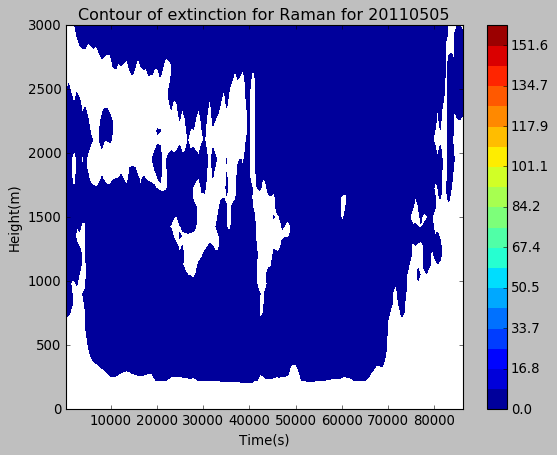

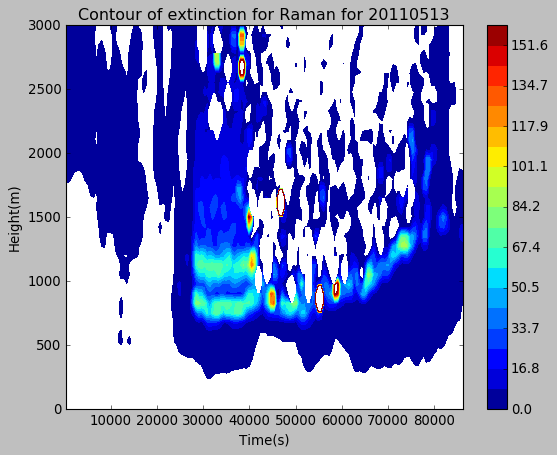

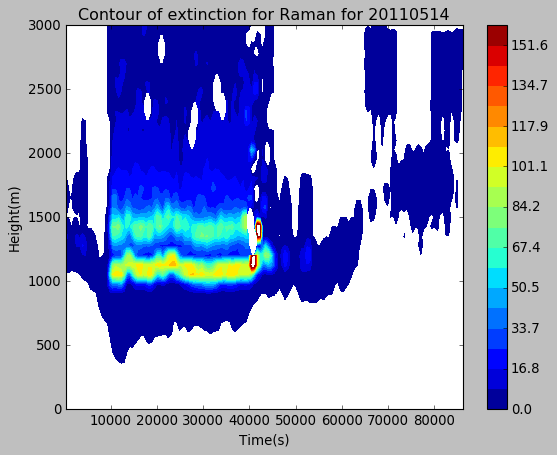

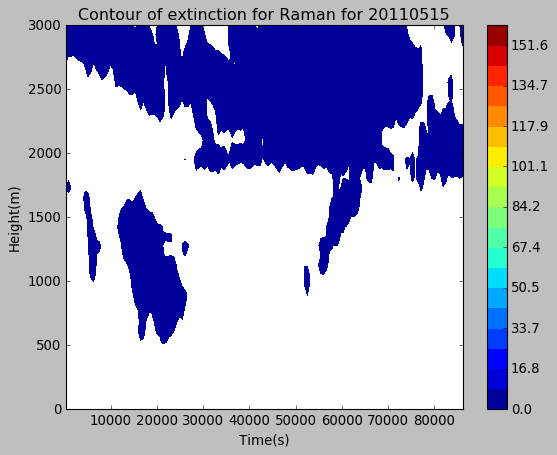

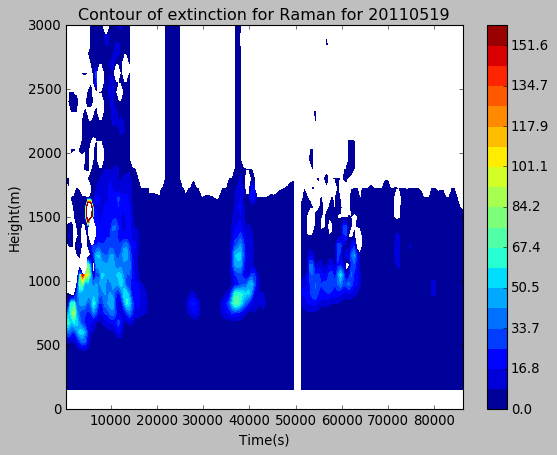

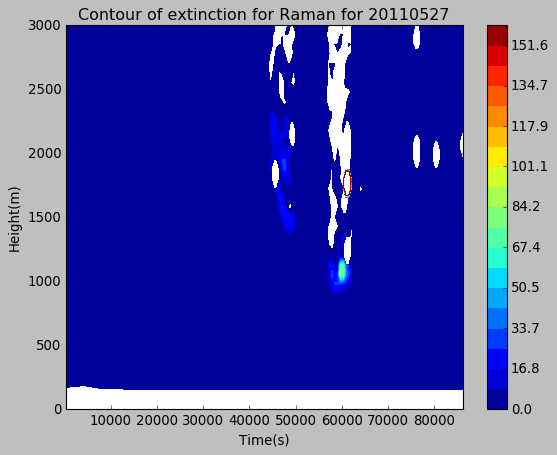

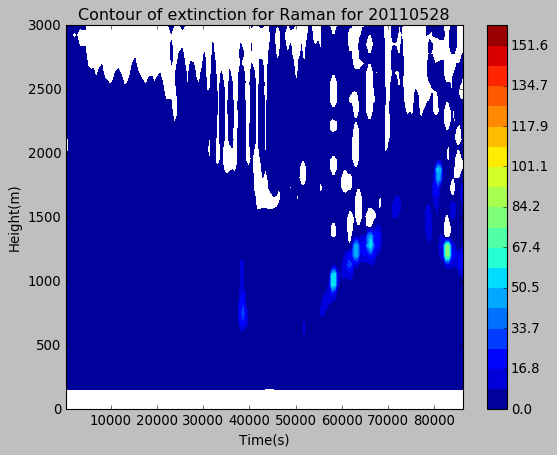

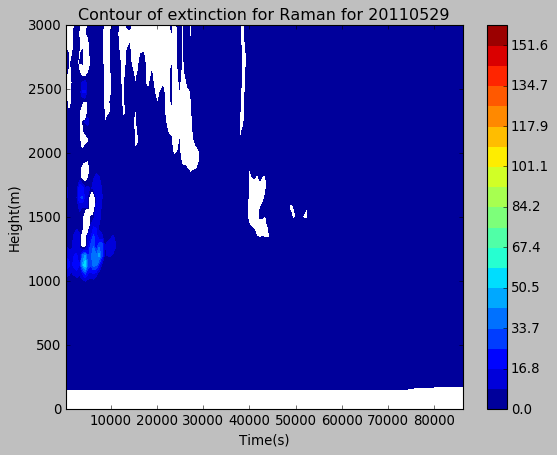

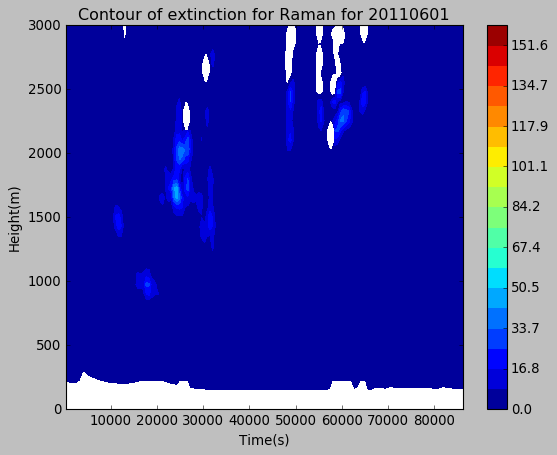

In [242]:
for dates in date:
    k1,m1,r1,s1=generate_cdfs(dates)
    tm=np.ma.filled(m1['time'][:])
    hm=np.ma.filled(m1['height'][:])
    tr=np.ma.filled(r1['time'][:])
    hr=np.ma.filled(r1['height'][:])*1000
    lwc=m1['liquid_water_content']
    ext=np.ma.filled(r1['ext'][:])
    plt.contourf(tr,hr,ext.T,levels=np.linspace(0,160,20))
    plt.colorbar()
    plt.ylim(0,3000)
    plt.xlabel('Time(s)')
    plt.ylabel('Height(m)')
    plt.title(f'Contour of extinction for Raman for {dates}')
    plt.savefig(f'C:/Users/yashg/OneDrive/Desktop/CMU/Project/Plots/cdc_calculation/extinction on{dates}.png')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice.
C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


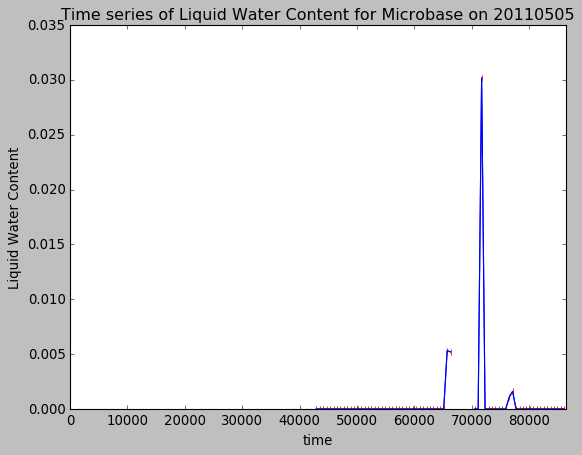

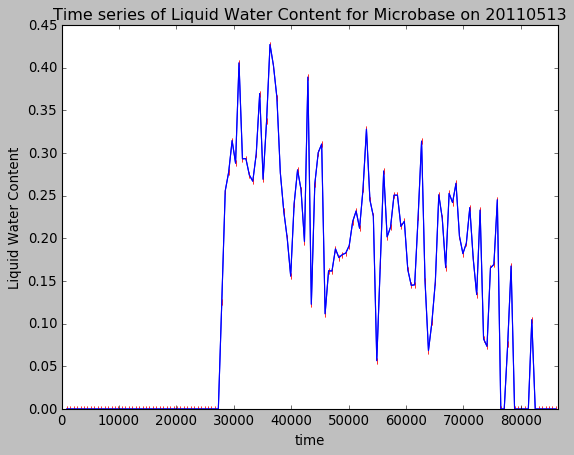

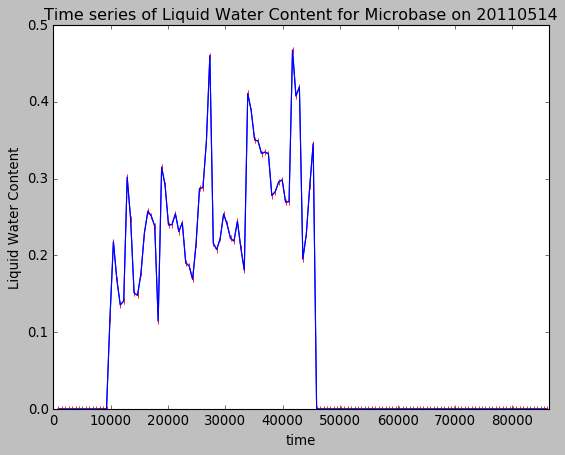

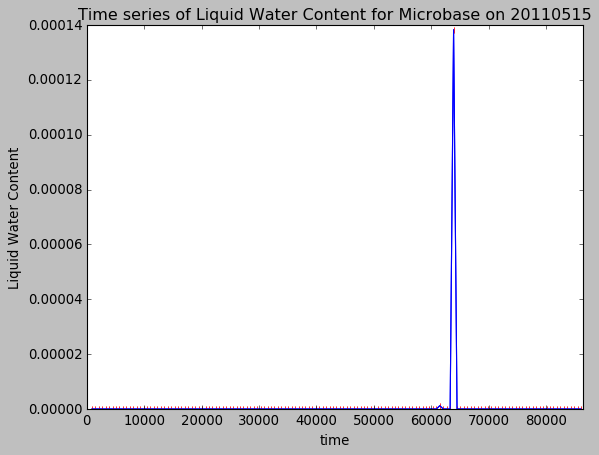

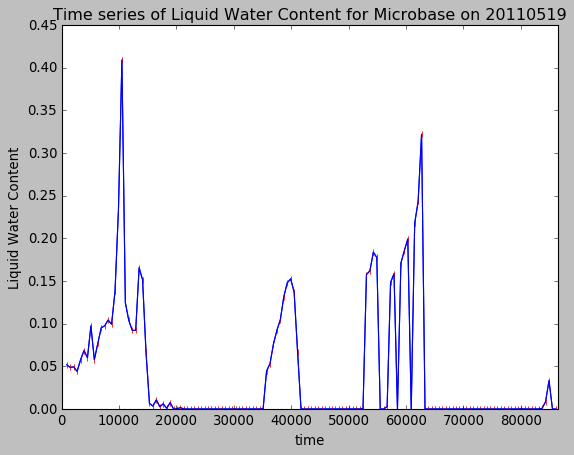

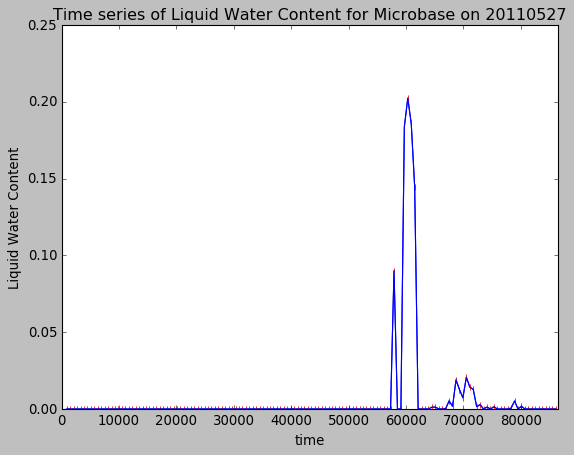

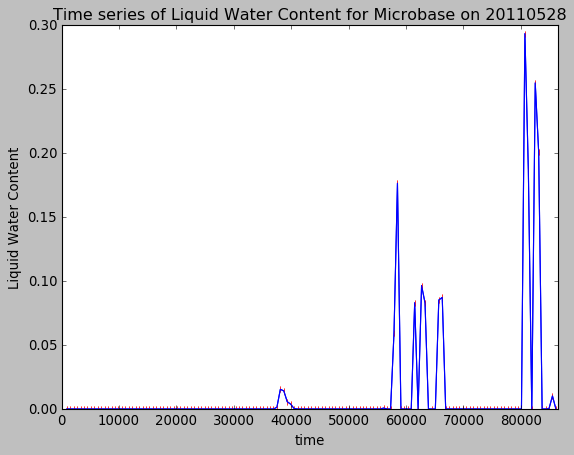

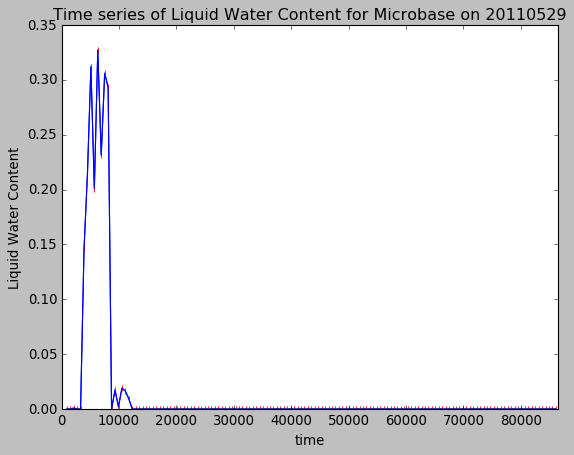

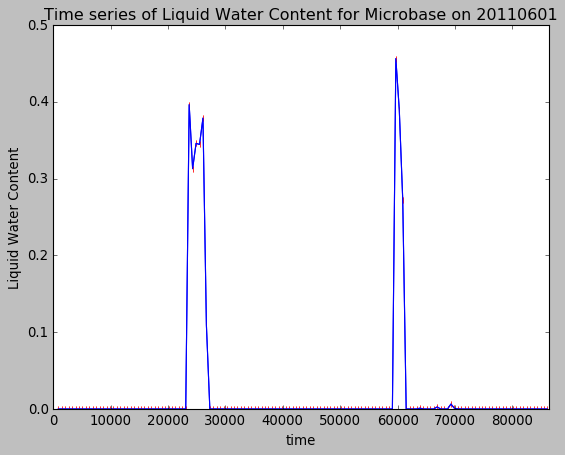

In [243]:
#Multiple days
d=[]
t=[]
e=[]
lwc=[]
for dates in date:
    k1,m1,r1,s1=generate_cdfs(dates)
    tm=np.ma.filled(m1['time'][:])
    hm=np.ma.filled(m1['height'][:])
    tr=np.ma.filled(r1['time'][:])
    hr=np.ma.filled(r1['height'][:])*1000
    lwc=m1['liquid_water_content']
    ext=np.ma.filled(r1['ext'][:])
    out=timeseries_base(hr,hm,tr,tm,lwc,'Liquid Water Content','Microbase',ext,dates,0,86400)